In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 161MB/s]
100% 1.06G/1.06G [00:05<00:00, 196MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers,models,optimizers
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [12]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [14]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(layers.Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(layers.Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(layers.Conv2D(256,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,601,729 (13.74 MB)

 Trainable params: 3,600,769 (13.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(train_ds,validation_data=validation_ds,batch_size=32,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.6230 - loss: 1.0754 - val_accuracy: 0.6268 - val_loss: 0.6209
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7533 - loss: 0.5013 - val_accuracy: 0.6118 - val_loss: 0.8307
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8095 - loss: 0.4057 - val_accuracy: 0.7710 - val_loss: 0.5287
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8521 - loss: 0.3315 - val_accuracy: 0.8486 - val_loss: 0.3781
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8866 - loss: 0.2570 - val_accuracy: 0.8714 - val_loss: 0.3686
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9096 - loss: 0.2140 - val_accuracy: 0.8192 - val_loss: 0.6241
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9246 - loss: 0.1747 - val_accuracy: 0.7494 - val_loss: 0.8319
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9419 - loss: 0.1443 - 

157/157 - 7s - 43ms/step - accuracy: 0.8808 - loss: 0.4528

Test accuracy: 0.8808


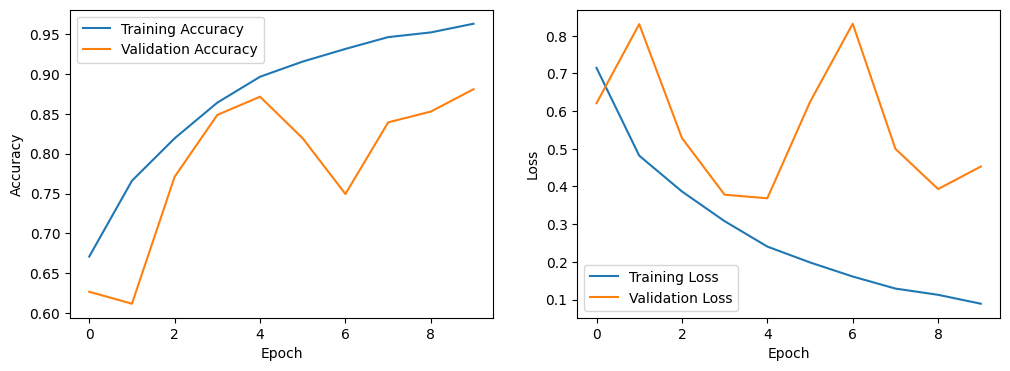

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
import cv2

In [26]:
data = cv2.imread("/content/dogs_vs_cats/test/cats/cat.10000.jpg")

if data is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


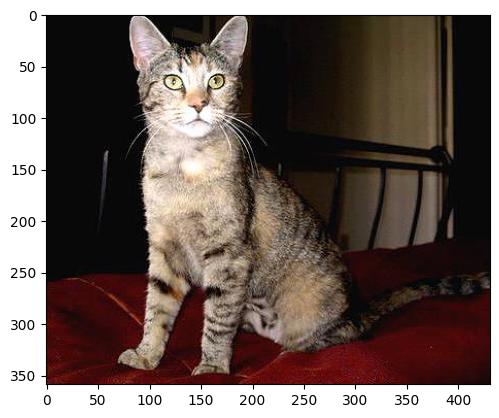

In [27]:
if data is not None:
    plt.imshow(cv2.cvtColor(data, cv2.COLOR_BGR2RGB))

In [28]:
data=cv2.resize(data,(256,256))

In [30]:
test_input=data.reshape((1,256,256,3))/255.0

In [31]:
r=model.predict(test_input)
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


array([[1.916753e-06]], dtype=float32)

In [32]:
if r[0]>0.5:
  print("Dog")
else:
  print("Cat")

Cat


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
import time